In [1]:
# Read data into dataframe, sort by date, and display columns
import pandas as pd
from datetime import datetime

df = pd.read_csv("sphist.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df = df.reset_index(drop=True)
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


#### "Close" column equals S&P 500 closing price

In [2]:
# Creating new lists for previous 5 day "Close" (mean and standard deviation),
# "Volume" (mean), 30 day "Close" (mean and standard deviation), and "Volume" (mean)
Past_5_ave_list = []
Past_5_std_list = []
Past_5_ave_vol_list = []
Past_30_ave_list = []
Past_30_std_list = []
Past_30_ave_vol_list = []
for index, row in df.iterrows():
    if index < 5:
        Past_5_ave_list.append(0)
        Past_5_std_list.append(0)
        Past_5_ave_vol_list.append(0)
    if index < 30:
        Past_30_ave_list.append(0)
        Past_30_std_list.append(0)
        Past_30_ave_vol_list.append(0)
    if index >= 5:
        i_5 = index - 5
        last_5_ave = df["Close"].iloc[i_5:index].mean()
        last_5_std = df["Close"].iloc[i_5:index].std()
        last_5_ave_vol = df["Volume"].iloc[i_5:index].mean()
        Past_5_ave_list.append(last_5_ave)
        Past_5_std_list.append(last_5_std)
        Past_5_ave_vol_list.append(last_5_ave_vol)
    if index >= 30:
        i_30 = index - 30
        last_30_ave = df["Close"].iloc[i_30:index].mean()
        Past_30_ave_list.append(last_30_ave)
        Past_30_std = df["Close"].iloc[i_30:index].std()
        Past_30_std_list.append(Past_30_std)
        last_30_ave_vol = df["Volume"].iloc[i_30:index].mean()
        Past_30_ave_vol_list.append(last_30_ave_vol)

In [3]:
# Adding new variable lists to dataframe
df["Past 5 Ave"] = Past_5_ave_list
df["Past 30 Ave"] = Past_30_ave_list
df["Past 5 Std"] = Past_5_std_list
df["Past 30 Std"] = Past_30_std_list
df["Past 5 Ave Volume"] = Past_5_ave_vol_list
df["Past 30 Ave Volume"] = Past_30_ave_list

In [4]:
# Creating new columns for the standard deviation of the last 5 days of the "Past 5 Ave" column
Past_5_ave_std_list = []
for index, row in df.iterrows():
    if index < 5:
        Past_5_ave_std_list.append(0)
    if index >= 5:
        i_5 = index - 5
        last_5_ave_std = df["Past 5 Ave"].iloc[i_5:index].std()
        Past_5_ave_std_list.append(last_5_ave_std)
df["Past 5 Ave Std"] = Past_5_ave_std_list

In [5]:
# # Creating new columns for previous 365 day "Close" (mean, standard deviation, min and max), "Volume" (mean)
Past_365_ave_list = []
Past_365_std_list = []
Past_365_ave_vol_list = []
Past_365_max_list = []
Past_365_min_list = []
for index, row in df.iterrows():
    if index < 365:
        Past_365_ave_list.append(0)
        Past_365_std_list.append(0)
        Past_365_ave_vol_list.append(0)
        Past_365_max_list.append(0)
        Past_365_min_list.append(0)
    if index >= 365:
        i_365 = index - 365
        last_365_ave = df["Close"].iloc[i_365:index].mean()
        last_365_std = df["Close"].iloc[i_365:index].std()
        last_365_ave_vol = df["Volume"].iloc[i_365:index].mean()
        Past_365_max = df["Close"].iloc[i_365:index].max()
        Past_365_min = df["Close"].iloc[i_365:index].min()
        Past_365_ave_list.append(last_365_ave)
        Past_365_std_list.append(last_365_std)
        Past_365_ave_vol_list.append(last_365_ave_vol)
        Past_365_max_list.append(Past_365_max)
        Past_365_min_list.append(Past_365_min)

df["Past 365 Ave"] = Past_365_ave_list
df["Past 365 Std"] = Past_365_std_list
df["Past 365 Ave Volume"] = Past_365_ave_vol_list
df["Past 365 Max"] = Past_365_max_list
df["Past 365 Min"] = Past_365_min_list

In [6]:
# Creating columns for ratio of previous days "Close" vs. "Past 365 Min" and "Past 365 Max"  
price_365_min_ratio_list = []
price_365_max_ratio_list = []
for index, row in df.iterrows():
    if index < 366:
        price_365_min_ratio_list.append(0)
        price_365_max_ratio_list.append(0)
    if index >= 366:
        i_1 = index - 1
        price_365_min_ratio = df["Close"].iloc[i_1] / df["Past 365 Min"].iloc[index]
        price_365_max_ratio = df["Close"].iloc[i_1] / df["Past 365 Max"].iloc[index]
        price_365_min_ratio_list.append(price_365_min_ratio)
        price_365_max_ratio_list.append(price_365_max_ratio)
df["Price 365 Max Ratio"] = price_365_min_ratio_list
df["Price 365 Min Ratio"] = price_365_max_ratio_list       

In [7]:
# Eliminating rows with 0 in new columns and NA values
df = df[df["Date"] > datetime(year=1951, month=1, day=2)]
df = df.dropna()

In [8]:
# Splitting dataframe into train and test sets
train = df[df["Date"] < datetime(year=2013, month=1, day=1)]
test = df[df["Date"] >= datetime(year=2013, month=1, day=1)]

In [9]:
# Training a Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cols = ["Price 365 Min Ratio", "Price 365 Max Ratio", "Past 365 Min", "Past 365 Max", "Past 5 Ave", "Past 30 Ave", "Past 5 Std", "Past 5 Ave Volume", "Past 30 Ave Volume", "Past 365 Ave", "Past 365 Std", "Past 365 Ave Volume", "Past 5 Ave Std"]

lr.fit(train[cols], train["Close"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Using the Linear Regression model to make predictions and determining error metric
predictions = lr.predict(test[cols])

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test["Close"], predictions)
print(mae)
print(test["Close"].mean())

16.0173843549
1874.8903383897166


#### Our Mean Absolute Error is off by just over 16 points and our average closing price is just under 1875.  This isn't a model we would want to use to actually make stock trades, but it isn't bad considering we only used features derived from the closing price and volume history.

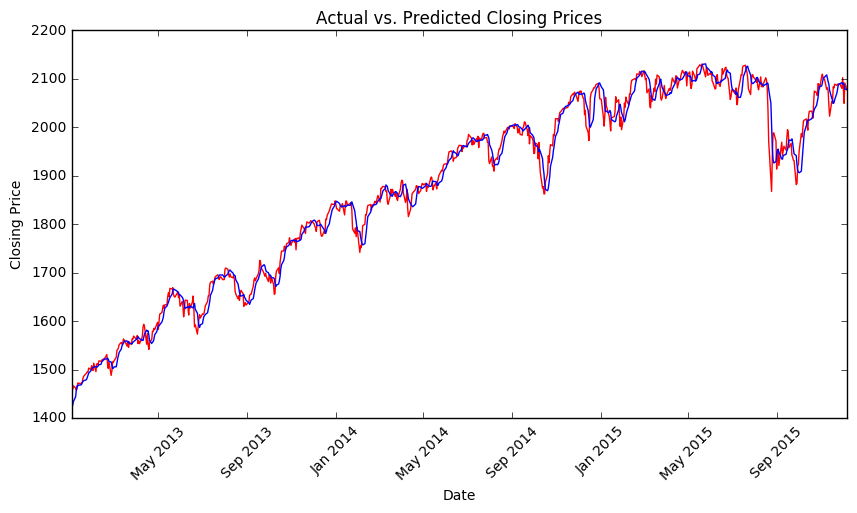

In [11]:
import matplotlib.pyplot as plt
close = test["Close"]
date = test["Date"]
fig = plt.figure(figsize=(10,5))
plt.plot(date, close, c='red')
plt.plot(date, predictions, c='blue')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.show()